In [100]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import random

#Particle Swarm Optimization (PSO)

Implement the Particle Swarm Optimisation algorithm to find the minimum of the following function:

$$f(x,y) = (1.5 – x -xy)^2 + (2.25 – x + xy^2)^2 + (2.625 – x + xy^3)^2$$ for $x,y$ in range $[-4.5, 4.5]$

Let's implement $f(x,y)$ and a single iteration of the algorithm. After 20 iterations, we will replace the value of c1 with the value of c2.

In [101]:
def f(x, y):
    return (1.5-x-x*y)**2 + (2.25-x+x*y**2)**2 + (2.625-x+x*y**3)**2

In [102]:
def iteration(i):
    global V, X, pbest, pbest_obj, gbest, gbest_obj

    w = 0.7

    # Set cognitive and social coefficients based on iteration count
    if i < 20:
        c1 = 0.5
        c2 = 0.1
    else:
        c1 = 0.1
        c2 = 0.5

    # Generate random numbers for updating velocity
    r1, r2 = np.random.rand(2)

    # Update velocity
    V = w * V + c1 * r1 * (pbest - X) + c2 * r2 * (gbest.reshape(-1,1) - X)

    # Update position
    X = X + V

    # Compute objective function value
    obj = f(X[0], X[1])

    # Update personal best positions and objective values
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)

    # Update global best position and objective value
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

First, let's visualize where this minimum is

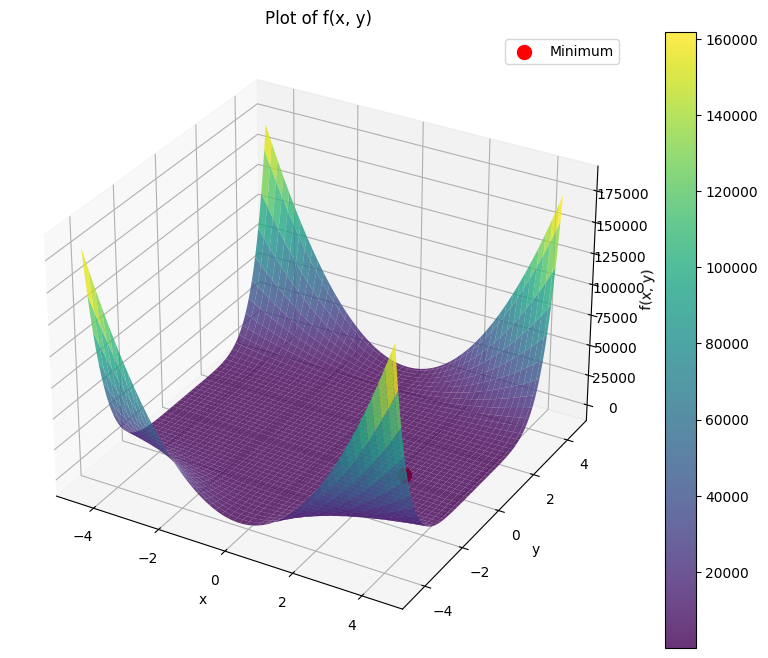

In [103]:
x = np.linspace(-4.5, 4.5, 100)
y = np.linspace(-4.5, 4.5, 100)
x, y = np.meshgrid(x, y)
z = f(x,y)
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8)
fig.colorbar(surf, ax=ax)
ax.set_title('Plot of f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

z_min = z.min()

ax.scatter(x_min, y_min, z_min, color='red', s=100, label='Minimum')

plt.legend()
plt.show()

Let's initialize the input

In [106]:
x, y = np.array(np.meshgrid(np.linspace(-4.5, 4.5,100), np.linspace(-4.5, 4.5,100)))
z = f(x, y)

n_particles = 25
X = (np.random.rand(2, n_particles) * 9) - 4.5
V = np.random.randn(2, n_particles) * 0.1

pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

We can now start the algorithm

PSO found best solution at f([ 2.51798122 -0.37463196])=0.01351449527300782
Global optimal at f([2.590909090909091, -0.40909090909090917])=0.03008514996880981


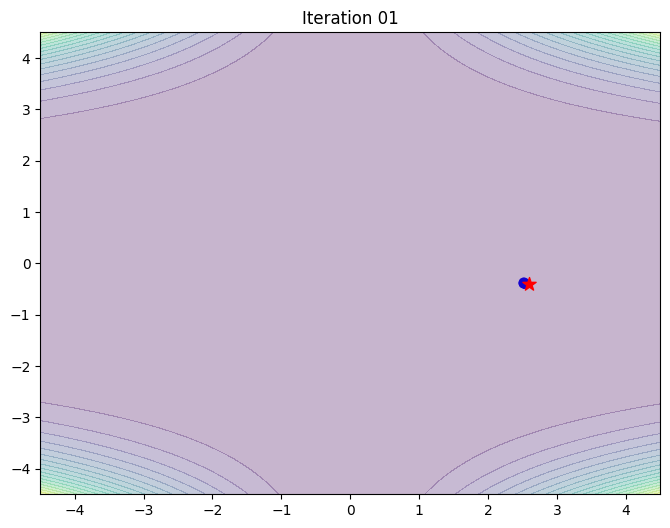

In [107]:
fig, ax = plt.subplots(figsize=(8,6))

# Particles and arrows
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)

# Function plot
x = np.linspace(-4.5, 4.5, 100)
y = np.linspace(-4.5, 4.5, 100)
x, y = np.meshgrid(x, y)
z = f(x,y)
contour = ax.contourf(x, y, z, levels=20, cmap='viridis', alpha=0.3)

# Minimum of the function
ax.scatter([x_min], [y_min], marker='*', s=100, color='red')

def animate(i):
    title = 'Iteration {:02d}'.format(i)
    iteration(i)
    ax.set_title(title)
    p_plot.set_offsets(X.T)  # Update particles' positions
    p_arrow.set_offsets(X.T)  # Update arrows' positions
    p_arrow.set_UVC(V[0], V[1])  # Update arrow vectors
    return p_plot, p_arrow

anim = FuncAnimation(fig, animate, frames=list(range(1, 51)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer="imagemagick")

print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))